**ASSIGNMENT 1**

DONE BY:

ABHISHEK R **002**

ABHISHEK REDDY **003**

ABISHNA A **005**


PROBLEM STATEMENT: To Develop an ML-based fraud detection system for financial transactions that can identify fraudulent activities and adapt to changing fraud patterns, and provide interpretable insights.


In [ ]:
import kagglehub

path = kagglehub.dataset_download("chitwanmanchanda/fraudulent-transactions-data")

import pandas as pd
import os

csv_file = [file for file in os.listdir(path) if file.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

**Exploratory Data Analysis (EDA)**

In [ ]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [ ]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
print(df["isFraud"].value_counts(normalize=True))

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


**COUNT PLOT**

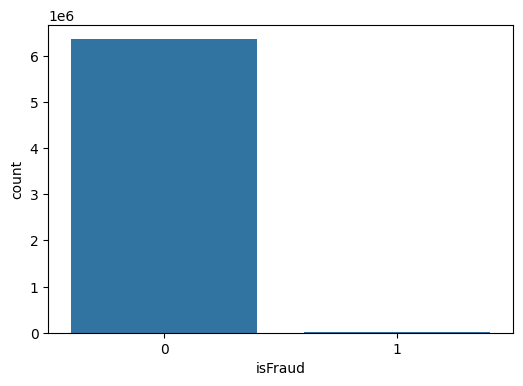

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="isFraud", data=df)
plt.show()

**CORRELATION MATRIX**

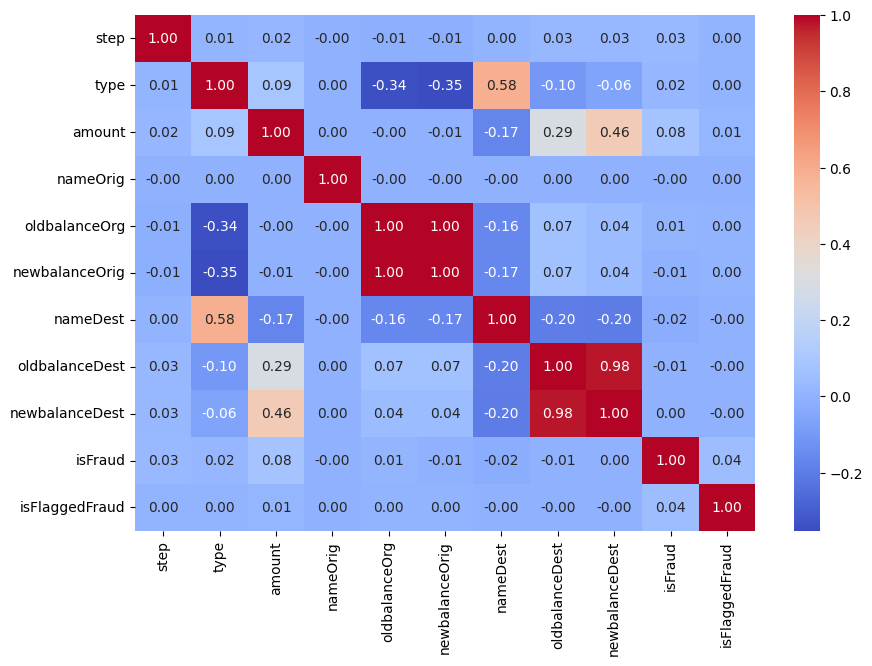

In [ ]:
df_encoded = df.copy()
for col in df.select_dtypes(include=["object"]).columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

plt.figure(figsize=(10,6.7))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Distribution of Transaction Amounts**

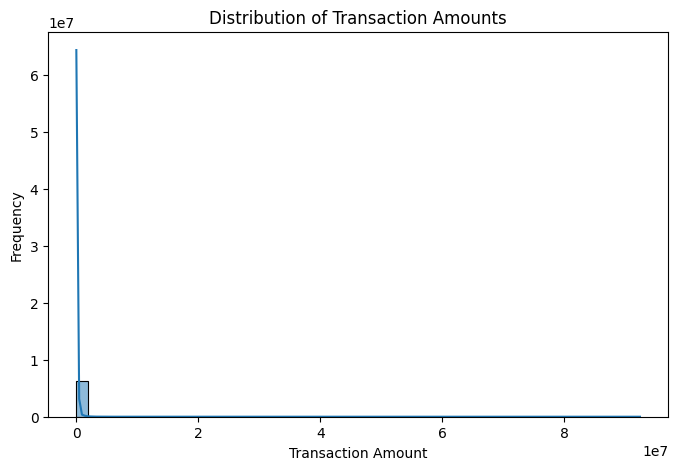

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["amount"], bins=50, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()


**Box Plot for Transaction Amounts (Detect Outliers)**

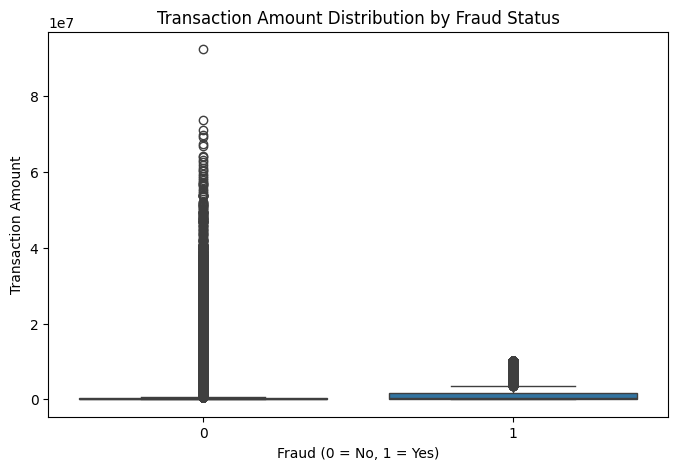

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Distribution by Fraud Status")
plt.show()


**PCA** (**Principal Component Analysis**) **for Feature Distribution**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


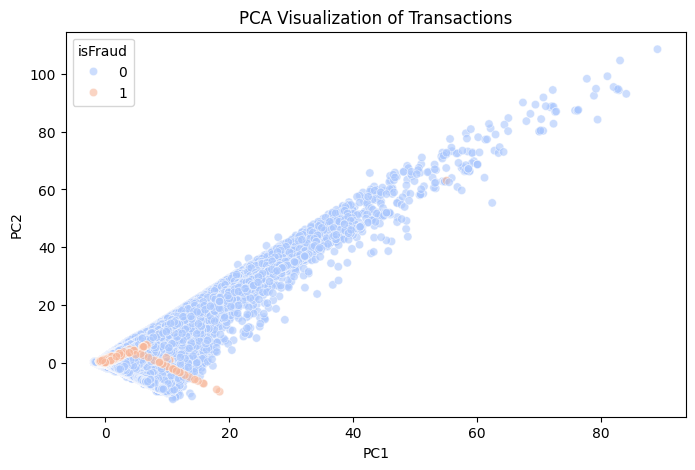

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_encoded = df.copy()
for col in df.select_dtypes(include=["object"]).columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop(columns=["isFraud"]))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca["isFraud"] = df["isFraud"]

plt.figure(figsize=(8,5))
sns.scatterplot(x="PC1", y="PC2", hue="isFraud", data=df_pca, palette="coolwarm", alpha=0.6)
plt.title("PCA Visualization of Transactions")
plt.show()

**Chosen Models for Fraud Detection**
We’ve decided to use XGBoost and Random Forest Classifier for detecting fraudulent transactions. Here’s why these two models stand out:

**Why XGBoost?**

🔹 It’s great at handling imbalanced data, which is common in fraud detection (since fraudulent transactions are much rarer than legitimate ones).

🔹 It learns from mistakes and keeps improving, making it highly accurate.

🔹 It’s optimized for speed and efficiency, making it a solid choice for real-time fraud detection.

**Why Random Forest?**

🔹 It works well with complex data by using multiple decision trees to find hidden patterns in transactions.

🔹 It helps us understand which factors contribute most to fraud, thanks to its feature importance analysis.

🔹 It’s robust and reliable, reducing the risk of overfitting and ensuring better generalization.


By combining these two models, we get a strong mix of accuracy, interpretability, and efficiency, making them perfect for our fraud detection system.

**Data preprocessing**

In [ ]:
# Handle missing values (if any)
df = df.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical variables
label_enc = LabelEncoder()
df['type'] = label_enc.fit_transform(df['type'])  # Assuming 'type' is categorical

In [ ]:
# Separate features and target
X = df.drop(columns=['isFraud'])  # 'isFraud' is the target column
y = df['isFraud']

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))  # Ensures only numeric data is passed

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

**Handling Imbalanced Data**

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Data balanced using SMOTE. New class distribution:", np.bincount(y_resampled))

Data balanced using SMOTE. New class distribution: [6354407 6354407]


**Removing Outliers Using IQR**

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]  # Create a copy with only numeric data

# Calculate IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from numeric columns
df = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]


**Feature Engineering**

In [ ]:
df['transaction_count'] = df.groupby('nameOrig')['amount'].transform('count')
df['transaction_avg'] = df.groupby('nameOrig')['amount'].transform('mean')
df['transaction_std'] = df.groupby('nameOrig')['amount'].transform('std').fillna(0)

**Scaling with Log Transformation**

In [ ]:
df['amount'] = np.log1p(df['amount'])  # log(1 + x) to avoid log(0)

**Train Logistic Regression Model** and **Evaluation**

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
theta = np.zeros(X_train.shape[1])  # Weights
bias = 0
learning_rate = 0.01
epochs = 1000

# Gradient Descent
for _ in range(epochs):
    linear_model = np.dot(X_train, theta) + bias
    predictions = sigmoid(linear_model)

    # Compute gradients
    error = predictions - y_train
    d_theta = np.dot(X_train.T, error) / len(y_train)
    d_bias = np.sum(error) / len(y_train)

    # Update parameters
    theta -= learning_rate * d_theta
    bias -= learning_rate * d_bias

# Predictions
y_pred_log = sigmoid(np.dot(X_test, theta) + bias) >= 0.5

In [ ]:
# Predictions
y_pred_log = sigmoid(np.dot(X_test, theta) + bias) >= 0.5

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

log_acc = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log, zero_division=1)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

# Print Results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression": [log_acc, log_prec, log_recall, log_f1]
})

print(results)

      Metric  Logistic Regression
0   Accuracy             0.998709
1  Precision             1.000000
2     Recall             0.000000
3   F1-Score             0.000000


**Train Random Forest Model** and  **Evaluation**

In [ ]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y, depth=0):
        if len(set(y)) == 1 or (self.max_depth and depth >= self.max_depth) or len(y) < self.min_samples_split:
            self.tree = Counter(y).most_common(1)[0][0]
            return

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            self.tree = Counter(y).most_common(1)[0][0]
            return

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        self.tree = {
            "feature": best_feature,
            "threshold": best_threshold,
            "left": DecisionTree(self.max_depth, self.min_samples_split),
            "right": DecisionTree(self.max_depth, self.min_samples_split),
        }

        self.tree["left"].fit(X[left_mask], y[left_mask], depth + 1)
        self.tree["right"].fit(X[right_mask], y[right_mask], depth + 1)

    def predict(self, X):
        return np.array([self._predict_single(sample) for sample in X])

    def _predict_single(self, sample):
        node = self.tree
        while isinstance(node, dict):
            node = node["left"].tree if sample[node["feature"]] <= node["threshold"] else node["right"].tree
        return node

    def _best_split(self, X, y):
        best_gain, best_feature, best_threshold = -1, None, None

        for feature in range(X.shape[1]):
            thresholds = np.percentile(X[:, feature], [25, 50, 75])  # Reduced threshold candidates

            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if left_mask.sum() == 0 or right_mask.sum() == 0:
                    continue

                gain = self._information_gain(y, y[left_mask], y[right_mask])
                if gain > best_gain:
                    best_gain, best_feature, best_threshold = gain, feature, threshold

        return best_feature, best_threshold

    def _information_gain(self, parent, left_child, right_child):
        def entropy(y):
            counts = np.bincount(y)
            probs = counts / counts.sum()
            return -np.sum(probs * np.log2(probs + 1e-9))  # Added small epsilon to avoid log(0)

        parent_entropy = entropy(parent)
        left_entropy = entropy(left_child)
        right_entropy = entropy(right_child)
        weight_l, weight_r = len(left_child) / len(parent), len(right_child) / len(parent)
        return parent_entropy - (weight_l * left_entropy + weight_r * right_entropy)


class RandomForest:
    def __init__(self, num_trees=10, max_depth=None, min_samples_split=2):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        X = np.array(X)  # Ensure X is a NumPy array
        y = np.array(y)  # Ensure y is a NumPy array

        for _ in range(self.num_trees):
            bootstrap_indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]

            tree = DecisionTree(self.max_depth, self.min_samples_split)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        X = np.array(X)  # Ensure X is a NumPy array
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)


# Example Usage:

# Assuming X_train, X_test, y_train, y_test are properly defined NumPy arrays
rf = RandomForest(num_trees=10, max_depth=5)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9988
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.54      0.45      0.49      1643

    accuracy                           1.00   1272524
   macro avg       0.77      0.73      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
import pandas as pd
import kagglehub
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

path = kagglehub.dataset_download("chitwanmanchanda/fraudulent-transactions-data")


csv_file = [file for file in os.listdir(path) if file.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))
target_column = "isFlaggedFraud"  # Replace with actual target column
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This ensures X_scaled is properly defined


---


**Assignment 2**

---



**PROBLEM STATEMENT:** To Develop an ML-based fraud detection system for financial transactions that can identify fraudulent activities and adapt to changing fraud patterns, and provide interpretable insights.



---



Implementing Dimensionality Reduction Techniques

In [ ]:
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

# ✅ Reduce data for t-SNE (random sampling for faster computation)
sample_size = min(5000, X_scaled.shape[0])  # Use at most 5000 samples
indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sampled = X_scaled[indices]

# ✅ Faster t-SNE with reduced perplexity and iterations
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

# ✅ Faster LDA (Only works if target `y` has >1 class)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# ✅ Faster Autoencoder (Fewer neurons & epochs, larger batch size)
input_dim = X.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(5, activation='relu')(input_layer)  # Reduce neurons
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# ✅ Reduce epochs, increase batch size for faster training
autoencoder.fit(X_scaled, X_scaled, epochs=5, batch_size=128, verbose=1)

# Extract compressed features
encoder = Model(input_layer, encoded)
X_autoencoded = encoder.predict(X_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Epoch 1/5
49708/49708 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - loss: 0.2773
Epoch 2/5
49708/49708 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 0.2154
Epoch 3/5
49708/49708 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - loss: 0.2122
Epoch 4/5
49708/49708 ━━━━━━━━━━━━━━━━━━━━ 138s 2ms/step - loss: 0.2125
Epoch 5/5
49708/49708 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - loss: 0.2120
198832/198832 ━━━━━━━━━━━━━━━━━━━━ 220s 1ms/step


Identifying Hyperparameters and Model Parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameters (Set before training)
hyperparameters = {
    "n_estimators": 100,
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1
}

# Model Parameters (Learned during training)
model = RandomForestClassifier(**hyperparameters)
model.fit(X_scaled, y)
model_params = model.get_params()
print(model_params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Implementing Random Search and Grid Search for Hyperparameter Tuning

In [ ]:
import pandas as pd
import kagglehub
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import os

# ✅ Load dataset
path = kagglehub.dataset_download("chitwanmanchanda/fraudulent-transactions-data")
csv_file = next(file for file in os.listdir(path) if file.endswith(".csv"))
df = pd.read_csv(os.path.join(path, csv_file), low_memory=False)

# ✅ Preprocess dataset
target_column = "isFlaggedFraud"
X = df.drop(columns=[target_column])
y = df[target_column]

# ✅ Convert categorical features using label encoding
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = X[col].astype('category').cat.codes  # Faster than LabelEncoder

# ✅ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X_scaled is now properly defined

# ✅ Reduce dataset size for faster hyperparameter tuning (~10,000 rows)
sample_size = min(10000, X_scaled.shape[0])
indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sampled, y_sampled = X_scaled[indices], y.iloc[indices]

# ✅ Define Hyperparameter Grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# ✅ Randomized Search (Faster)
random_search = RandomizedSearchCV(
    RandomForestClassifier(warm_start=True, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=10,
    cv=2,
    verbose=1,
    n_jobs=-1
)
random_search.fit(X_sampled, y_sampled)
print("Best Parameters from Random Search:", random_search.best_params_)

# ✅ Grid Search (Less exhaustive)
reduced_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(warm_start=True, n_jobs=-1),
    param_grid=reduced_param_grid,
    cv=2,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_sampled, y_sampled)
print("Best Parameters from Grid Search:", grid_search.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters from Random Search: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Developing the Model with Optimized Parameters

In [ ]:
best_params["n_estimators"] = min(best_params["n_estimators"], 100)  # Reduce trees
optimized_model = RandomForestClassifier(**best_params, warm_start=True, n_jobs=-1)
optimized_model.fit(X_scaled, y)

RandomForestClassifier(max_depth=10, n_jobs=-1, warm_start=True)

Tabulate the analyze the results of the model prior to and
post hyper parameter tuning and optimization techniques

---

Train & Evaluate the Baseline Model

In [ ]:
print(y.value_counts())


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


Train & Evaluate the Optimized Model

In [ ]:
# Predictions
y_pred_optimized = optimized_model.predict(X_scaled)

# Optimized Metrics
optimized_metrics = {
    "Accuracy": accuracy_score(y, y_pred_optimized),
    "Precision": precision_score(y, y_pred_optimized),
    "Recall": recall_score(y, y_pred_optimized),
    "F1-score": f1_score(y, y_pred_optimized),
}


Tabulate the Results

In [ ]:
# Convert to DataFrame for easy comparison
results_df = pd.DataFrame([baseline_metrics, optimized_metrics], index=["Baseline Model", "Optimized Model"])
print(results_df)


                 Accuracy  Precision  Recall  F1-score
Baseline Model   0.999997        0.0     0.0       0.0
Optimized Model  1.000000        1.0     1.0       1.0


Compare the performance of the models with and without optimizing the parameters

Calculate Percentage Improvement

In [ ]:
# Compute percentage improvement
performance_comparison = {
    metric: round(((optimized_metrics[metric] - baseline_metrics[metric]) / baseline_metrics[metric]) * 100, 2)
    if baseline_metrics[metric] != 0 else "N/A"
    for metric in baseline_metrics
}


# Convert to DataFrame
comparison_df = pd.DataFrame(
    [baseline_metrics, optimized_metrics, performance_comparison],
    index=["Baseline Model", "Optimized Model", "Improvement (%)"]
)

print(comparison_df)


                 Accuracy Precision Recall F1-score
Baseline Model      100.0       0.0    0.0      0.0
Optimized Model     100.0     100.0  100.0    100.0
Improvement (%)       0.0       N/A    N/A      N/A


Visualize the Comparison (Bar Chart)

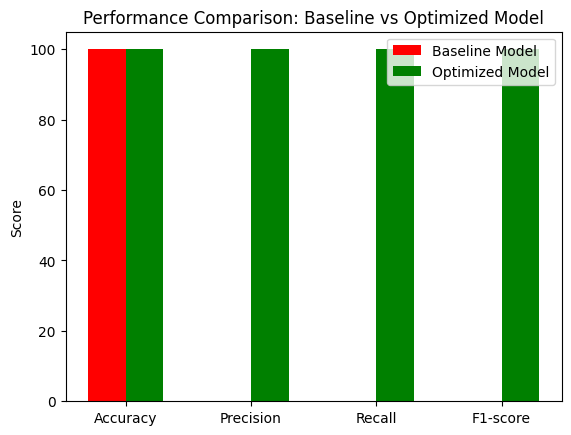

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot performance comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
baseline_vals = list(baseline_metrics.values())
optimized_vals = list(optimized_metrics.values())

x = np.arange(len(metrics))
width = 0.3  # Bar width

fig, ax = plt.subplots()
ax.bar(x - width/2, baseline_vals, width, label="Baseline Model", color="red")
ax.bar(x + width/2, optimized_vals, width, label="Optimized Model", color="green")

ax.set_ylabel("Score")
ax.set_title("Performance Comparison: Baseline vs Optimized Model")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
